In [1]:
import sys
import os

file_path = globals()['_dh'][0]
sys.path.append(os.path.abspath(os.path.join(file_path, "../..")))

import numpy as np
from model_equations import Model
from miniature_octo_chainsaw.logging_ import logger
from miniature_octo_chainsaw.preprocessing.preprocess_data import DataPreprocessor
from miniature_octo_chainsaw.parameter_estimation.initial_guess import InitialGuessGenerator
from miniature_octo_chainsaw.parameter_estimation.parameter_estimator import ParameterEstimator
from miniature_octo_chainsaw.parameter_estimation.results import save_results_as_pickle

logger.setLevel("INFO")

[10-09 10:17:55] {yaml_parser:128} INFO - Model specifications not loaded yet. Parsing now.
[10-09 10:17:55] {yaml_parser:38} INFO - Parsing model specifications.
[10-09 10:17:55] {yaml_parser:18} INFO - Loading YAML file: c:\Users\hridy\Documents\uni-heidelberg\software\miniature-octo-chainsaw\examples\predator_prey/model_specifications.yaml
[10-09 10:17:55] {yaml_parser:21} INFO - Successfully loaded YAML file.
[10-09 10:17:55] {yaml_parser:132} INFO - Meta parameters not loaded yet. Parsing now.
[10-09 10:17:55] {yaml_parser:49} INFO - Parsing meta parameters.
[10-09 10:17:55] {yaml_parser:18} INFO - Loading YAML file: c:\Users\hridy\Documents\uni-heidelberg\software\miniature-octo-chainsaw\examples\predator_prey/meta_parameters.yaml
[10-09 10:17:55] {yaml_parser:21} INFO - Successfully loaded YAML file.
[10-09 10:17:55] {base_model:69} INFO - True model parameters: {'delta': 0.05, 'Ni': 160, 'Bc': 3.3, 'Kc': 4.3, 'Bb': 2.25, 'Kb': 15, 'epsilon': 0.25, 'm': 0.055, 'lambda': 0.4}
[10

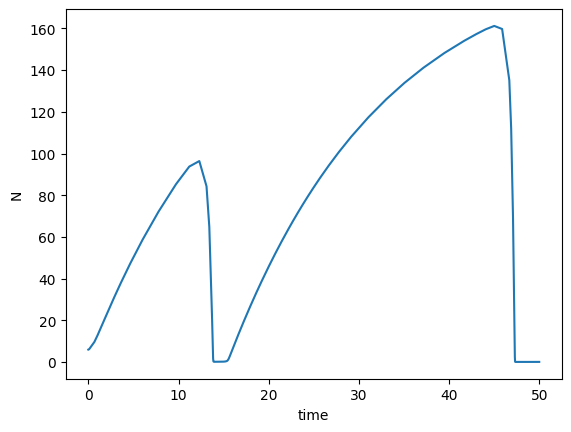

[10-09 10:17:56] {initial_guess:27} INFO - Step 2: Continue the steady state to draw a bifurcation diagram.


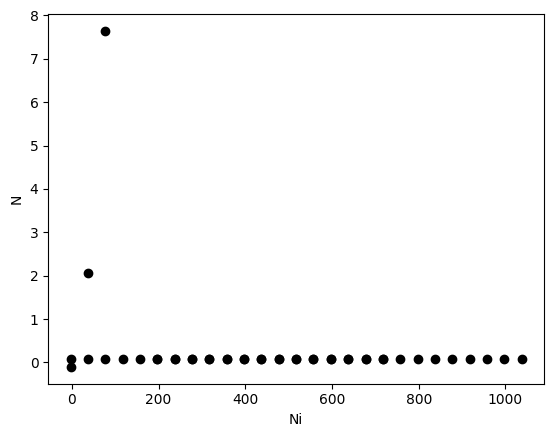

[10-09 10:18:00] {deflated_continuation:505} INFO - Bifurcations were detected near the following values of Ni:
[10-09 10:18:00] {deflated_continuation:507} INFO - 1: 37.20905220380254
[10-09 10:18:00] {deflated_continuation:507} INFO - 2: 77.20905220380254
[10-09 10:18:05] {bifurcation_point:113} WARNING - Objective function is satisfied only upto 1.930e-02
[10-09 10:18:05] {bifurcation_point:115} INFO - Found a bifurcation point at 37.21130378723497.
[10-09 10:18:05] {initial_guess:32} INFO - Step 3: Trace a two-parameter bifurcation diagram along the data.


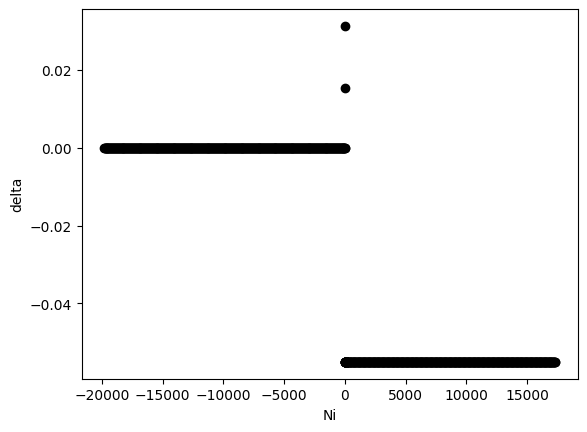

[10-09 10:18:53] {initial_guess:37} INFO - Step 5: Match the predicted points to experimental data.
[10-09 10:18:53] {initial_guess:43} INFO - Step 6: Append global parameters to the initial guess.


In [2]:
# Load the model and randomize the parameters
model = Model()
model.generate_parameter_guesses()

# Preprocess the data
data_preprocessor = DataPreprocessor()
data_preprocessor.load_the_data(file_path=os.path.join(file_path))
data_preprocessor.add_noise_to_the_data(scale=model.data_noise)
data_preprocessor.select_subset_of_data(length=25)
model.data = data_preprocessor.data

# Generate initial guesses for the parameter estimation
initializer = InitialGuessGenerator(model=model)

In [3]:
# Solve parameter estimation problem
fit_osqp = ParameterEstimator(
    x0=initializer.initial_guesses,
    mask=initializer.mask,
    model=model,
    n_experiments=int(sum(initializer.mask)),
    method="osqp",
    plot_iters=True,
    compute_ci=True,
    timer=True,
)

[10-09 10:18:53] {parameter_estimator:82} INFO - Estimate the model parameters using osqp solver.


Exception: CQ failed!

In [ ]:
fit_gn = ParameterEstimator(
    x0=initializer.initial_guesses,
    mask=initializer.mask,
    model=model,
    n_experiments=int(sum(initializer.mask)),
    method="gauss-newton",
    plot_iters=True,
    compute_ci=True,
    timer=True,
)

In [ ]:
np.diag(fit_osqp.result.covariance_matrix)[:20]

In [ ]:
np.diag(fit_gn.result.covariance_matrix)[:20]

In [ ]:
fit_gn.result.x[:10]

In [ ]:
fit_osqp.result.x[:10]